## Intro
In this notebook, I'm dealing with many files. Each file consisting spatial data of significant wave height (covering Indonesia region), in one time (monthly mean), from 1980 to 2019. My objective is to analyze how significant wave height changes over time. So, before doing that, I should group all the files, and storing them in a list.

But, I can't group all the files with just looping and storing it in a list!. Because the files not in the correct order, as you can see in the image below. 

<img src="f3.png" style="width:737px;height:310px"/>
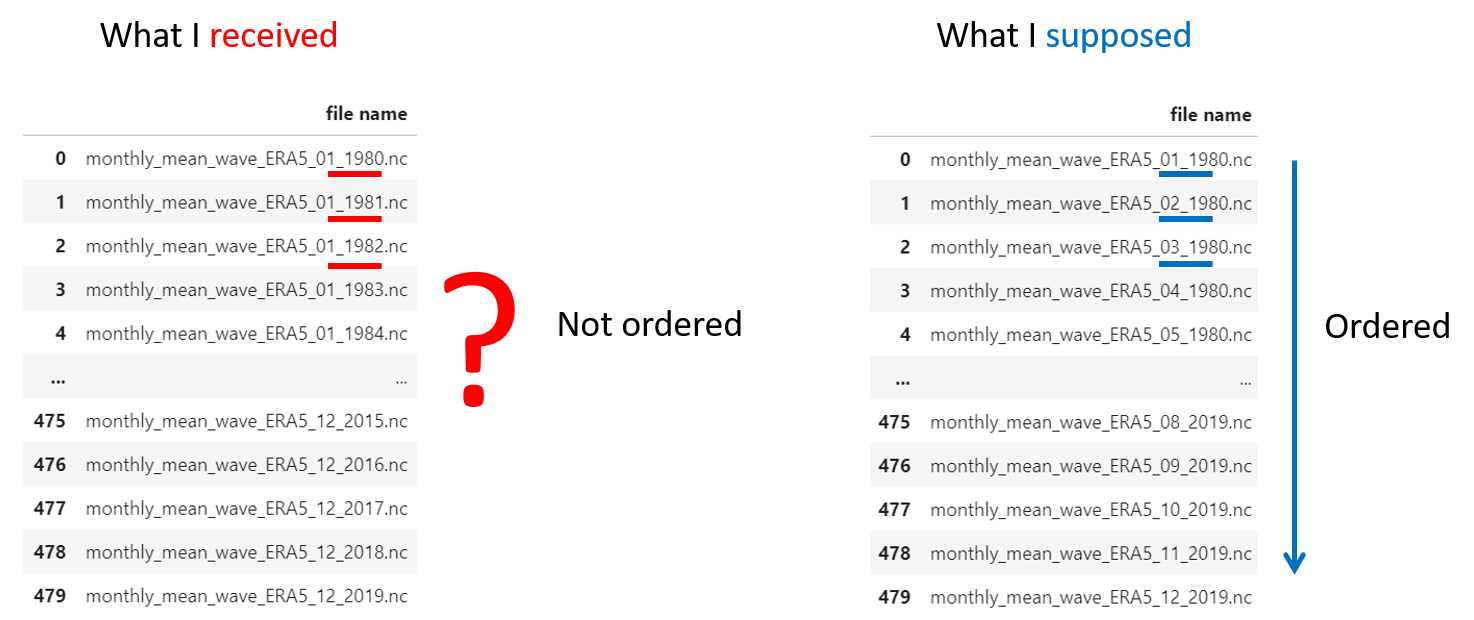

### Import library

In [12]:
import pandas as pd
import glob
import re # Regex: used for manipulating text

### load all files using .glob

In [13]:
my_files = [] 
for each_file in glob.glob('*.nc'):
   my_files.append(each_file)
print("There are " +str(len(my_files)) +" files")

There are 480 files


In [14]:
file_raw = pd.DataFrame(my_files, columns=['file name'])
file_raw

,file name
0,monthly_mean_wave_ERA5_01_1980.nc
1,monthly_mean_wave_ERA5_01_1981.nc
2,monthly_mean_wave_ERA5_01_1982.nc
3,monthly_mean_wave_ERA5_01_1983.nc
4,monthly_mean_wave_ERA5_01_1984.nc
...,...
475,monthly_mean_wave_ERA5_12_2015.nc
476,monthly_mean_wave_ERA5_12_2016.nc
477,monthly_mean_wave_ERA5_12_2017.nc
478,monthly_mean_wave_ERA5_12_2018.nc


As you can see in table above, the files not arranged in the right order. So, to solve this issue, we can doing by manipulating file name, and sort them again into desired format.

In [17]:
# manipulating and sorting file name

def sort_file_name():
    
    # define file name
    file_name = "monthly_mean_wave_ERA5_01_1980.nc" #initiating file
    
    file_store = []
    
    for yyyy in range(1980, 2020): 
        
        yyyy = str(yyyy)
        file_name = re.sub(r"\d{4}", yyyy, file_name) #for manipulating year
        for mm in range(1, 13):
            
            if mm < 10:
                mm = str(mm).zfill(2) + "_"# fill zero at the beginning of the string
            else:
                mm = str(mm) + "_"
                
            file_name = re.sub(r"\d{2}\_", mm, file_name) #for manipulating month
            file_store.append(file_name)
      
    return file_store

In [18]:
ordered_file = pd.DataFrame(sort_file_name(), columns=['file name'])
ordered_file                            

,file name
0,monthly_mean_wave_ERA5_01_1980.nc
1,monthly_mean_wave_ERA5_02_1980.nc
2,monthly_mean_wave_ERA5_03_1980.nc
3,monthly_mean_wave_ERA5_04_1980.nc
4,monthly_mean_wave_ERA5_05_1980.nc
...,...
475,monthly_mean_wave_ERA5_08_2019.nc
476,monthly_mean_wave_ERA5_09_2019.nc
477,monthly_mean_wave_ERA5_10_2019.nc
478,monthly_mean_wave_ERA5_11_2019.nc


Finally, as you can see above, all files have been in correct order.